# OPEN CV Line Detection

https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

In [2]:
# system
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))

from config.path import get_training_data_path

import cv2
import numpy as np
import matplotlib.pyplot as plt

19
Current Angle:  -12.462388790127498


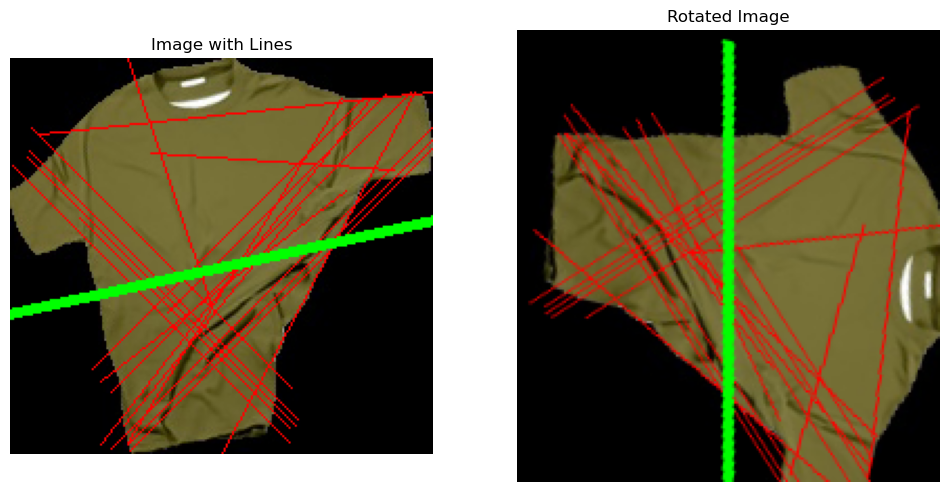

In [20]:


def correct_rotation_and_display_with_lines(image_path="", image=""):
    # Load image
    if image_path:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for displaying

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    gray = cv2.equalizeHist(gray)

    # Detect edges
    edges = cv2.Canny(gray, 100, 150, apertureSize=5)

    #plt.imshow(edges)

    # Use Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=80, minLineLength=100, maxLineGap=10)

    print(len(lines))

    if lines is not None:
        angles = []
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 1)  # Draw each detected line in red
            angle = np.arctan2(y2 - y1, x2 - x1)
            angles.append(angle)
        
        # Calculate the mean angle
        mean_angle = np.mean(angles)
        mean_angle_degrees = mean_angle * 180 / np.pi
        
        # Calculate average line direction
        cos_mean_angle = np.cos(mean_angle)
        sin_mean_angle = np.sin(mean_angle)

        width, height, channels = image.shape

        x_center, y_center = width // 2, height // 2
        line_length = 1000  # Arbitrary length for visual representation
        x1_avg = int(x_center - line_length * cos_mean_angle)
        y1_avg = int(y_center - line_length * sin_mean_angle)
        x2_avg = int(x_center + line_length * cos_mean_angle)
        y2_avg = int(y_center + line_length * sin_mean_angle)
        cv2.line(image, (x1_avg, y1_avg), (x2_avg, y2_avg), (0, 255, 0), 3)  # Draw average line in green

        print("Current Angle: ", mean_angle_degrees)

        mean_angle_degrees = 90 -mean_angle_degrees

        # Rotate image to align
        rotation_matrix = cv2.getRotationMatrix2D((x_center, y_center), -mean_angle_degrees, 1)
        rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    else:
        rotated_image = image  # No rotation if no lines are detected

    # Display the original and rotated image using matplotlib
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(image)
    plt.title('Image with Lines')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(rotated_image)
    plt.title('Rotated Image')
    plt.axis('off')

    plt.show()

#file_name = 'tshirt_0070.jpg'
file_name = 'tshirt_0071.jpg'

img_path = get_training_data_path(file_name)

correct_rotation_and_display_with_lines(img_path)